In [3]:
import pandas as pd
from scipy import stats
import numpy as np
import random
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data_dir = "/home/ucsd-train25/scratch/projects/atlas_full/processed_files/"

In [5]:
tpm = pd.read_csv(data_dir+"tpm_all_vg_0.05.csv", index_col=0)
print(tpm.shape)
tpm.head()

(4067, 7216)


,B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal,B1_AAACCGTGCCAAGT_Tuft,B1_AAACGCACAGCCTA_Goblet,B1_AAACGCACCAGATC_Endocrine,B1_AAACGCACCGCCTT_Stem,B1_AAACGCACCGTAGT_Stem,B1_AAACGGCTGATAGA_TA.Early,B1_AAACTTGAAGAGTA_Enterocyte.Mature.Proximal,B1_AAACTTGACCACAA_TA.G1,B1_AAAGACGATTGTCT_Enterocyte.Mature.Proximal,...,B10_TTCAGTTGCCTCGT_Enterocyte.Mature.Proximal,B10_TTCATGACCATTCT_Enterocyte.Progenitor.Early,B10_TTCATGTGCGAGTT_Goblet,B10_TTCCAAACTAGAGA_Goblet,B10_TTCGGAGAGACGTT_Enterocyte.Progenitor.Early,B10_TTCTACGAATGCCA_Enterocyte.Progenitor.Early,B10_TTCTGATGGCATCA_Enterocyte.Progenitor.Early,B10_TTGACACTACCAAC_TA.G2,B10_TTGAGGTGTACTCT_Enterocyte.Mature.Proximal,B10_TTGCTATGGGCATT_Paneth
4732440D04Rik,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Mcmdc2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Cspp1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.153891
Prdm14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Trpa1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


(array([3.981e+03, 5.300e+01, 1.900e+01, 8.000e+00, 4.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([  0.        ,  16.2055983 ,  32.4111966 ,  48.61679489,
         64.82239319,  81.02799149,  97.23358979, 113.43918808,
        129.64478638, 145.85038468, 162.05598298]),
 <a list of 10 Patch objects>)

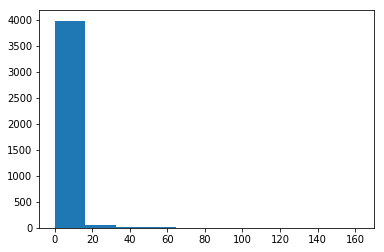

In [7]:
plt.hist(tpm['B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal'], bins=10)

In [9]:
tpm.rank(axis=0)['B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal'].max()

4067.0

In [10]:
ranked = tpm.rank(axis=0)

In [11]:
correlation = ranked.corr()

In [12]:
correlation.head()

,B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal,B1_AAACCGTGCCAAGT_Tuft,B1_AAACGCACAGCCTA_Goblet,B1_AAACGCACCAGATC_Endocrine,B1_AAACGCACCGCCTT_Stem,B1_AAACGCACCGTAGT_Stem,B1_AAACGGCTGATAGA_TA.Early,B1_AAACTTGAAGAGTA_Enterocyte.Mature.Proximal,B1_AAACTTGACCACAA_TA.G1,B1_AAAGACGATTGTCT_Enterocyte.Mature.Proximal,...,B10_TTCAGTTGCCTCGT_Enterocyte.Mature.Proximal,B10_TTCATGACCATTCT_Enterocyte.Progenitor.Early,B10_TTCATGTGCGAGTT_Goblet,B10_TTCCAAACTAGAGA_Goblet,B10_TTCGGAGAGACGTT_Enterocyte.Progenitor.Early,B10_TTCTACGAATGCCA_Enterocyte.Progenitor.Early,B10_TTCTGATGGCATCA_Enterocyte.Progenitor.Early,B10_TTGACACTACCAAC_TA.G2,B10_TTGAGGTGTACTCT_Enterocyte.Mature.Proximal,B10_TTGCTATGGGCATT_Paneth
B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal,1.000000,0.549428,0.570326,0.558077,0.623167,0.596678,0.623350,0.632923,0.580287,0.537122,...,0.500334,0.521285,0.498265,0.524370,0.508796,0.543791,0.429585,0.518086,0.503879,0.489513
B1_AAACCGTGCCAAGT_Tuft,0.549428,1.000000,0.520262,0.462747,0.549329,0.555857,0.549877,0.483878,0.507513,0.383873,...,0.322474,0.390952,0.426154,0.428477,0.463847,0.404365,0.346651,0.440333,0.328120,0.399325
B1_AAACGCACAGCCTA_Goblet,0.570326,0.520262,1.000000,0.530862,0.604404,0.559166,0.556037,0.527919,0.540111,0.434946,...,0.394487,0.440443,0.448293,0.538508,0.459447,0.450385,0.355494,0.424927,0.414437,0.502904
B1_AAACGCACCAGATC_Endocrine,0.558077,0.462747,0.530862,1.000000,0.525252,0.497836,0.503412,0.545943,0.490169,0.461411,...,0.424761,0.463672,0.420510,0.457684,0.433789,0.454236,0.363864,0.430318,0.415565,0.442492
B1_AAACGCACCGCCTT_Stem,0.623167,0.549329,0.604404,0.525252,1.000000,0.621999,0.599798,0.547215,0.583768,0.463071,...,0.425120,0.491260,0.469847,0.515945,0.513529,0.492760,0.380039,0.494807,0.417781,0.497007


In [13]:
correlation.to_csv(data_dir+"tpm_all_vg_0.05_corr.csv")

In [5]:
correlation = pd.read_csv(data_dir+"tpm_all_vg_0.05_corr.csv", index_col=0)

In [6]:
correlation.head()

,B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal,B1_AAACCGTGCCAAGT_Tuft,B1_AAACGCACAGCCTA_Goblet,B1_AAACGCACCAGATC_Endocrine,B1_AAACGCACCGCCTT_Stem,B1_AAACGCACCGTAGT_Stem,B1_AAACGGCTGATAGA_TA.Early,B1_AAACTTGAAGAGTA_Enterocyte.Mature.Proximal,B1_AAACTTGACCACAA_TA.G1,B1_AAAGACGATTGTCT_Enterocyte.Mature.Proximal,...,B10_TTCAGTTGCCTCGT_Enterocyte.Mature.Proximal,B10_TTCATGACCATTCT_Enterocyte.Progenitor.Early,B10_TTCATGTGCGAGTT_Goblet,B10_TTCCAAACTAGAGA_Goblet,B10_TTCGGAGAGACGTT_Enterocyte.Progenitor.Early,B10_TTCTACGAATGCCA_Enterocyte.Progenitor.Early,B10_TTCTGATGGCATCA_Enterocyte.Progenitor.Early,B10_TTGACACTACCAAC_TA.G2,B10_TTGAGGTGTACTCT_Enterocyte.Mature.Proximal,B10_TTGCTATGGGCATT_Paneth
B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal,1.000000,0.549428,0.570326,0.558077,0.623167,0.596678,0.623350,0.632923,0.580287,0.537122,...,0.500334,0.521285,0.498265,0.524370,0.508796,0.543791,0.429585,0.518086,0.503879,0.489513
B1_AAACCGTGCCAAGT_Tuft,0.549428,1.000000,0.520262,0.462747,0.549329,0.555857,0.549877,0.483878,0.507513,0.383873,...,0.322474,0.390952,0.426154,0.428477,0.463847,0.404365,0.346651,0.440333,0.328120,0.399325
B1_AAACGCACAGCCTA_Goblet,0.570326,0.520262,1.000000,0.530862,0.604404,0.559166,0.556037,0.527919,0.540111,0.434946,...,0.394487,0.440443,0.448293,0.538508,0.459447,0.450385,0.355494,0.424927,0.414437,0.502904
B1_AAACGCACCAGATC_Endocrine,0.558077,0.462747,0.530862,1.000000,0.525252,0.497836,0.503412,0.545943,0.490169,0.461411,...,0.424761,0.463672,0.420510,0.457684,0.433789,0.454236,0.363864,0.430318,0.415565,0.442492
B1_AAACGCACCGCCTT_Stem,0.623167,0.549329,0.604404,0.525252,1.000000,0.621999,0.599798,0.547215,0.583768,0.463071,...,0.425120,0.491260,0.469847,0.515945,0.513529,0.492760,0.380039,0.494807,0.417781,0.497007


In [29]:
get_batch = correlation.reset_index()
get_batch.head()

,index,B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal,B1_AAACCGTGCCAAGT_Tuft,B1_AAACGCACAGCCTA_Goblet,B1_AAACGCACCAGATC_Endocrine,B1_AAACGCACCGCCTT_Stem,B1_AAACGCACCGTAGT_Stem,B1_AAACGGCTGATAGA_TA.Early,B1_AAACTTGAAGAGTA_Enterocyte.Mature.Proximal,B1_AAACTTGACCACAA_TA.G1,...,B10_TTCAGTTGCCTCGT_Enterocyte.Mature.Proximal,B10_TTCATGACCATTCT_Enterocyte.Progenitor.Early,B10_TTCATGTGCGAGTT_Goblet,B10_TTCCAAACTAGAGA_Goblet,B10_TTCGGAGAGACGTT_Enterocyte.Progenitor.Early,B10_TTCTACGAATGCCA_Enterocyte.Progenitor.Early,B10_TTCTGATGGCATCA_Enterocyte.Progenitor.Early,B10_TTGACACTACCAAC_TA.G2,B10_TTGAGGTGTACTCT_Enterocyte.Mature.Proximal,B10_TTGCTATGGGCATT_Paneth
0,B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal,1.000000,0.549428,0.570326,0.558077,0.623167,0.596678,0.623350,0.632923,0.580287,...,0.500334,0.521285,0.498265,0.524370,0.508796,0.543791,0.429585,0.518086,0.503879,0.489513
1,B1_AAACCGTGCCAAGT_Tuft,0.549428,1.000000,0.520262,0.462747,0.549329,0.555857,0.549877,0.483878,0.507513,...,0.322474,0.390952,0.426154,0.428477,0.463847,0.404365,0.346651,0.440333,0.328120,0.399325
2,B1_AAACGCACAGCCTA_Goblet,0.570326,0.520262,1.000000,0.530862,0.604404,0.559166,0.556037,0.527919,0.540111,...,0.394487,0.440443,0.448293,0.538508,0.459447,0.450385,0.355494,0.424927,0.414437,0.502904
3,B1_AAACGCACCAGATC_Endocrine,0.558077,0.462747,0.530862,1.000000,0.525252,0.497836,0.503412,0.545943,0.490169,...,0.424761,0.463672,0.420510,0.457684,0.433789,0.454236,0.363864,0.430318,0.415565,0.442492
4,B1_AAACGCACCGCCTT_Stem,0.623167,0.549329,0.604404,0.525252,1.000000,0.621999,0.599798,0.547215,0.583768,...,0.425120,0.491260,0.469847,0.515945,0.513529,0.492760,0.380039,0.494807,0.417781,0.497007


In [30]:
get_batch['batch'] = get_batch['index'].apply(lambda x: x.split("_")[0])
get_batch.head()

,index,B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal,B1_AAACCGTGCCAAGT_Tuft,B1_AAACGCACAGCCTA_Goblet,B1_AAACGCACCAGATC_Endocrine,B1_AAACGCACCGCCTT_Stem,B1_AAACGCACCGTAGT_Stem,B1_AAACGGCTGATAGA_TA.Early,B1_AAACTTGAAGAGTA_Enterocyte.Mature.Proximal,B1_AAACTTGACCACAA_TA.G1,...,B10_TTCATGACCATTCT_Enterocyte.Progenitor.Early,B10_TTCATGTGCGAGTT_Goblet,B10_TTCCAAACTAGAGA_Goblet,B10_TTCGGAGAGACGTT_Enterocyte.Progenitor.Early,B10_TTCTACGAATGCCA_Enterocyte.Progenitor.Early,B10_TTCTGATGGCATCA_Enterocyte.Progenitor.Early,B10_TTGACACTACCAAC_TA.G2,B10_TTGAGGTGTACTCT_Enterocyte.Mature.Proximal,B10_TTGCTATGGGCATT_Paneth,batch
0,B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal,1.000000,0.549428,0.570326,0.558077,0.623167,0.596678,0.623350,0.632923,0.580287,...,0.521285,0.498265,0.524370,0.508796,0.543791,0.429585,0.518086,0.503879,0.489513,B1
1,B1_AAACCGTGCCAAGT_Tuft,0.549428,1.000000,0.520262,0.462747,0.549329,0.555857,0.549877,0.483878,0.507513,...,0.390952,0.426154,0.428477,0.463847,0.404365,0.346651,0.440333,0.328120,0.399325,B1
2,B1_AAACGCACAGCCTA_Goblet,0.570326,0.520262,1.000000,0.530862,0.604404,0.559166,0.556037,0.527919,0.540111,...,0.440443,0.448293,0.538508,0.459447,0.450385,0.355494,0.424927,0.414437,0.502904,B1
3,B1_AAACGCACCAGATC_Endocrine,0.558077,0.462747,0.530862,1.000000,0.525252,0.497836,0.503412,0.545943,0.490169,...,0.463672,0.420510,0.457684,0.433789,0.454236,0.363864,0.430318,0.415565,0.442492,B1
4,B1_AAACGCACCGCCTT_Stem,0.623167,0.549329,0.604404,0.525252,1.000000,0.621999,0.599798,0.547215,0.583768,...,0.491260,0.469847,0.515945,0.513529,0.492760,0.380039,0.494807,0.417781,0.497007,B1


In [31]:
get_batch['celltype'] = get_batch['index'].apply(lambda x: x.split("_")[2])
get_batch.head()

,index,B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal,B1_AAACCGTGCCAAGT_Tuft,B1_AAACGCACAGCCTA_Goblet,B1_AAACGCACCAGATC_Endocrine,B1_AAACGCACCGCCTT_Stem,B1_AAACGCACCGTAGT_Stem,B1_AAACGGCTGATAGA_TA.Early,B1_AAACTTGAAGAGTA_Enterocyte.Mature.Proximal,B1_AAACTTGACCACAA_TA.G1,...,B10_TTCATGTGCGAGTT_Goblet,B10_TTCCAAACTAGAGA_Goblet,B10_TTCGGAGAGACGTT_Enterocyte.Progenitor.Early,B10_TTCTACGAATGCCA_Enterocyte.Progenitor.Early,B10_TTCTGATGGCATCA_Enterocyte.Progenitor.Early,B10_TTGACACTACCAAC_TA.G2,B10_TTGAGGTGTACTCT_Enterocyte.Mature.Proximal,B10_TTGCTATGGGCATT_Paneth,batch,celltype
0,B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal,1.000000,0.549428,0.570326,0.558077,0.623167,0.596678,0.623350,0.632923,0.580287,...,0.498265,0.524370,0.508796,0.543791,0.429585,0.518086,0.503879,0.489513,B1,Enterocyte.Immature.Distal
1,B1_AAACCGTGCCAAGT_Tuft,0.549428,1.000000,0.520262,0.462747,0.549329,0.555857,0.549877,0.483878,0.507513,...,0.426154,0.428477,0.463847,0.404365,0.346651,0.440333,0.328120,0.399325,B1,Tuft
2,B1_AAACGCACAGCCTA_Goblet,0.570326,0.520262,1.000000,0.530862,0.604404,0.559166,0.556037,0.527919,0.540111,...,0.448293,0.538508,0.459447,0.450385,0.355494,0.424927,0.414437,0.502904,B1,Goblet
3,B1_AAACGCACCAGATC_Endocrine,0.558077,0.462747,0.530862,1.000000,0.525252,0.497836,0.503412,0.545943,0.490169,...,0.420510,0.457684,0.433789,0.454236,0.363864,0.430318,0.415565,0.442492,B1,Endocrine
4,B1_AAACGCACCGCCTT_Stem,0.623167,0.549329,0.604404,0.525252,1.000000,0.621999,0.599798,0.547215,0.583768,...,0.469847,0.515945,0.513529,0.492760,0.380039,0.494807,0.417781,0.497007,B1,Stem


In [32]:
batches = get_batch['batch'].unique()
batches

array(['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10'],
      dtype=object)

In [33]:
celltypes = get_batch['celltype'].unique()
celltypes

array(['Enterocyte.Immature.Distal', 'Tuft', 'Goblet', 'Endocrine',
       'Stem', 'TA.Early', 'Enterocyte.Mature.Proximal', 'TA.G1', 'TA.G2',
       'Enterocyte.Progenitor.Early', 'Enterocyte.Progenitor.Late',
       'Enterocyte.Immature.Proximal', 'Paneth', 'Enterocyte.Progenitor',
       'Enterocyte.Mature.Distal'], dtype=object)

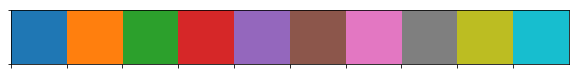

In [34]:
batch_palette = sns.color_palette(n_colors = len(batches))
sns.palplot(batch_palette)

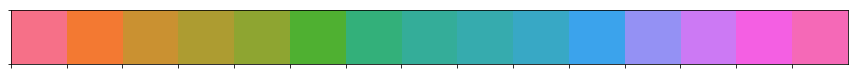

In [35]:
celltype_palette = sns.color_palette('husl', n_colors = len(celltypes))
sns.palplot(celltype_palette)

In [36]:
batch_palette

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [37]:
batches

array(['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10'],
      dtype=object)

In [38]:
batch_color_assignment = dict(zip(batches, batch_palette))
batch_color_assignment

{'B1': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 'B2': (1.0, 0.4980392156862745, 0.054901960784313725),
 'B3': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 'B4': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 'B5': (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 'B6': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 'B7': (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 'B8': (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 'B9': (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 'B10': (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)}

In [39]:
celltype_color_assignment = dict(zip(celltypes, celltype_palette))
celltype_color_assignment

{'Enterocyte.Immature.Distal': (0.9677975592919913,
  0.44127456009157356,
  0.5358103155058701),
 'Tuft': (0.9542900080364486, 0.4779505175890752, 0.1963917622115608),
 'Goblet': (0.7930046244373694, 0.5708100522446624, 0.19489531984381053),
 'Endocrine': (0.6804189127793346, 0.6151497514677574, 0.19405452111445337),
 'Stem': (0.5571803870240879, 0.6507747739933957, 0.19331667588333168),
 'TA.Early': (0.3126890019504329, 0.6928754610296064, 0.1923704830330379),
 'Enterocyte.Mature.Proximal': (0.20125317221201128,
  0.6907920815379025,
  0.47966761189275336),
 'TA.G1': (0.20774052347943134, 0.6813852191365138, 0.6002900398972028),
 'TA.G2': (0.21316806282417172, 0.6731234926210208, 0.6838056741516414),
 'Enterocyte.Progenitor.Early': (0.21979956608283252,
  0.6625157876850336,
  0.7732093159317208),
 'Enterocyte.Progenitor.Late': (0.23299120924703914,
  0.639586552066035,
  0.9260706093977744),
 'Enterocyte.Immature.Proximal': (0.5830408541921136,
  0.5695319215803094,
  0.958359196636

In [56]:
to_keep = random.sample(set(correlation.columns), 1000)
print(len(to_keep))
to_keep[:5]

1000


['B9_ATTAAGACTTCTTG_Stem',
 'B2_GAGGACGAATGGTC_Goblet',
 'B1_GTATTCACATCACG_Stem',
 'B7_CTTTACGAACTCAG_Enterocyte.Progenitor.Late',
 'B7_AAGTGCACCTGCAA_Enterocyte.Progenitor']

In [57]:
to_keep

['B9_ATTAAGACTTCTTG_Stem',
 'B2_GAGGACGAATGGTC_Goblet',
 'B1_GTATTCACATCACG_Stem',
 'B7_CTTTACGAACTCAG_Enterocyte.Progenitor.Late',
 'B7_AAGTGCACCTGCAA_Enterocyte.Progenitor',
 'B2_GCTACGCTATCTTC_Enterocyte.Progenitor',
 'B5_GACAACTGCCAGTA_TA.G1',
 'B2_AACTCACTCTCCCA_Enterocyte.Immature.Distal',
 'B8_TCAGTACTTTACTC_Enterocyte.Mature.Proximal',
 'B1_AGGAATGACTAGAC_Paneth',
 'B1_TACGGCCTTGCTGA_Enterocyte.Progenitor',
 'B2_TCCCGAACTCTATC_Paneth',
 'B7_GCCGGAACGTATCG_Goblet',
 'B3_CGACCTACGTGCTA_Enterocyte.Immature.Distal',
 'B1_AGGAAATGACAGTC_Enterocyte.Progenitor.Early',
 'B2_ATAATGACTCGACA_TA.Early',
 'B9_GCATGATGCCTTGC_TA.Early',
 'B1_ATCACTTGGAACCT_Enterocyte.Immature.Proximal',
 'B7_GCCAAATGCGAGAG_Stem',
 'B1_GACCTAGACAGCTA_Tuft',
 'B5_GTAGTGTGTCCTTA_Enterocyte.Progenitor.Late',
 'B9_TACTGTTGGAGGGT_TA.Early',
 'B3_GGCAAGGATAGCCA_Stem',
 'B7_CGCTACACTCTCCG_Enterocyte.Mature.Distal',
 'B9_TAGGTCGAACTACG_TA.G1',
 'B3_CTGTAACTAACGTC_TA.G2',
 'B8_ATACTCTGGGTCTA_Enterocyte.Mature.Distal',


In [58]:
correlation[['B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal','B1_AAACCGTGCCAAGT_Tuft']].head()

,B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal,B1_AAACCGTGCCAAGT_Tuft
B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal,1.000000,0.549428
B1_AAACCGTGCCAAGT_Tuft,0.549428,1.000000
B1_AAACGCACAGCCTA_Goblet,0.570326,0.520262
B1_AAACGCACCAGATC_Endocrine,0.558077,0.462747
B1_AAACGCACCGCCTT_Stem,0.623167,0.549329


In [59]:
subset = correlation[to_keep]
subset = subset.T[to_keep]
print(subset.shape)
subset.head()

(1000, 1000)


,B9_ATTAAGACTTCTTG_Stem,B2_GAGGACGAATGGTC_Goblet,B1_GTATTCACATCACG_Stem,B7_CTTTACGAACTCAG_Enterocyte.Progenitor.Late,B7_AAGTGCACCTGCAA_Enterocyte.Progenitor,B2_GCTACGCTATCTTC_Enterocyte.Progenitor,B5_GACAACTGCCAGTA_TA.G1,B2_AACTCACTCTCCCA_Enterocyte.Immature.Distal,B8_TCAGTACTTTACTC_Enterocyte.Mature.Proximal,B1_AGGAATGACTAGAC_Paneth,...,B2_TTGCTATGGGTGGA_Enterocyte.Immature.Distal,B3_GCAGATACCAGTTG_Stem,B2_GATATATGTGGAAA_Stem,B9_ACGAACTGTTCGGA_TA.G2,B1_TGCGCACTATAAGG_TA.G1,B2_ACAGACACTGCTCC_TA.G2,B3_GTTGACGATCTAGG_TA.Early,B9_CATAAATGCGCATA_Enterocyte.Progenitor.Early,B9_TTTAGCTGCTGAAC_Goblet,B7_ATACCACTCTGGAT_TA.Early
B9_ATTAAGACTTCTTG_Stem,1.000000,0.462177,0.504291,0.497548,0.492723,0.501617,0.512263,0.497909,0.399027,0.460887,...,0.463562,0.520432,0.559131,0.438272,0.501040,0.497311,0.530460,0.480448,0.481640,0.550158
B2_GAGGACGAATGGTC_Goblet,0.462177,1.000000,0.468402,0.493518,0.452160,0.500542,0.454375,0.520470,0.393103,0.498084,...,0.467060,0.418762,0.447965,0.391103,0.466354,0.426693,0.483941,0.465931,0.517583,0.495669
B1_GTATTCACATCACG_Stem,0.504291,0.468402,1.000000,0.486585,0.457281,0.528293,0.479530,0.509874,0.354642,0.532490,...,0.452807,0.456128,0.531967,0.428091,0.615120,0.516807,0.496962,0.486962,0.460172,0.512261
B7_CTTTACGAACTCAG_Enterocyte.Progenitor.Late,0.497548,0.493518,0.486585,1.000000,0.569071,0.551576,0.536167,0.550093,0.532064,0.421720,...,0.533261,0.484303,0.514831,0.443605,0.534009,0.483344,0.574061,0.581689,0.476770,0.584166
B7_AAGTGCACCTGCAA_Enterocyte.Progenitor,0.492723,0.452160,0.457281,0.569071,1.000000,0.539002,0.532459,0.532883,0.422608,0.425064,...,0.468825,0.458154,0.488393,0.421269,0.510062,0.515149,0.555301,0.587135,0.497611,0.553229


In [60]:
get_batch = subset.reset_index()
get_batch['batch'] = get_batch['index'].apply(lambda x: x.split("_")[0])
get_batch['celltype'] = get_batch['index'].apply(lambda x: x.split("_")[2])
get_batch.set_index("index", inplace=True, drop=True)
get_batch.head()

,B9_ATTAAGACTTCTTG_Stem,B2_GAGGACGAATGGTC_Goblet,B1_GTATTCACATCACG_Stem,B7_CTTTACGAACTCAG_Enterocyte.Progenitor.Late,B7_AAGTGCACCTGCAA_Enterocyte.Progenitor,B2_GCTACGCTATCTTC_Enterocyte.Progenitor,B5_GACAACTGCCAGTA_TA.G1,B2_AACTCACTCTCCCA_Enterocyte.Immature.Distal,B8_TCAGTACTTTACTC_Enterocyte.Mature.Proximal,B1_AGGAATGACTAGAC_Paneth,...,B2_GATATATGTGGAAA_Stem,B9_ACGAACTGTTCGGA_TA.G2,B1_TGCGCACTATAAGG_TA.G1,B2_ACAGACACTGCTCC_TA.G2,B3_GTTGACGATCTAGG_TA.Early,B9_CATAAATGCGCATA_Enterocyte.Progenitor.Early,B9_TTTAGCTGCTGAAC_Goblet,B7_ATACCACTCTGGAT_TA.Early,batch,celltype
index,,,,,,,,,,,,,,,,,,,,,
B9_ATTAAGACTTCTTG_Stem,1.000000,0.462177,0.504291,0.497548,0.492723,0.501617,0.512263,0.497909,0.399027,0.460887,...,0.559131,0.438272,0.501040,0.497311,0.530460,0.480448,0.481640,0.550158,B9,Stem
B2_GAGGACGAATGGTC_Goblet,0.462177,1.000000,0.468402,0.493518,0.452160,0.500542,0.454375,0.520470,0.393103,0.498084,...,0.447965,0.391103,0.466354,0.426693,0.483941,0.465931,0.517583,0.495669,B2,Goblet
B1_GTATTCACATCACG_Stem,0.504291,0.468402,1.000000,0.486585,0.457281,0.528293,0.479530,0.509874,0.354642,0.532490,...,0.531967,0.428091,0.615120,0.516807,0.496962,0.486962,0.460172,0.512261,B1,Stem
B7_CTTTACGAACTCAG_Enterocyte.Progenitor.Late,0.497548,0.493518,0.486585,1.000000,0.569071,0.551576,0.536167,0.550093,0.532064,0.421720,...,0.514831,0.443605,0.534009,0.483344,0.574061,0.581689,0.476770,0.584166,B7,Enterocyte.Progenitor.Late
B7_AAGTGCACCTGCAA_Enterocyte.Progenitor,0.492723,0.452160,0.457281,0.569071,1.000000,0.539002,0.532459,0.532883,0.422608,0.425064,...,0.488393,0.421269,0.510062,0.515149,0.555301,0.587135,0.497611,0.553229,B7,Enterocyte.Progenitor


In [61]:
batch_assignment = get_batch['batch']
celltype_assignment = get_batch['celltype']

In [62]:
batch_assignment.head()

index
B9_ATTAAGACTTCTTG_Stem                          B9
B2_GAGGACGAATGGTC_Goblet                        B2
B1_GTATTCACATCACG_Stem                          B1
B7_CTTTACGAACTCAG_Enterocyte.Progenitor.Late    B7
B7_AAGTGCACCTGCAA_Enterocyte.Progenitor         B7
Name: batch, dtype: object

In [63]:
batch_color_assignment

{'B1': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 'B2': (1.0, 0.4980392156862745, 0.054901960784313725),
 'B3': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 'B4': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 'B5': (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 'B6': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 'B7': (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 'B8': (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 'B9': (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 'B10': (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)}

In [64]:
batch_colors_for_plot = batch_assignment.map(batch_color_assignment)
celltype_colors_for_plot = celltype_assignment.map(celltype_color_assignment)

In [65]:
celltype_colors_for_plot.head()

index
B9_ATTAAGACTTCTTG_Stem                          (0.5571803870240879, 0.6507747739933957, 0.193...
B2_GAGGACGAATGGTC_Goblet                        (0.7930046244373694, 0.5708100522446624, 0.194...
B1_GTATTCACATCACG_Stem                          (0.5571803870240879, 0.6507747739933957, 0.193...
B7_CTTTACGAACTCAG_Enterocyte.Progenitor.Late    (0.23299120924703914, 0.639586552066035, 0.926...
B7_AAGTGCACCTGCAA_Enterocyte.Progenitor         (0.959647907830888, 0.3748291312853892, 0.8930...
Name: celltype, dtype: object

In [66]:
subset.head()

,B9_ATTAAGACTTCTTG_Stem,B2_GAGGACGAATGGTC_Goblet,B1_GTATTCACATCACG_Stem,B7_CTTTACGAACTCAG_Enterocyte.Progenitor.Late,B7_AAGTGCACCTGCAA_Enterocyte.Progenitor,B2_GCTACGCTATCTTC_Enterocyte.Progenitor,B5_GACAACTGCCAGTA_TA.G1,B2_AACTCACTCTCCCA_Enterocyte.Immature.Distal,B8_TCAGTACTTTACTC_Enterocyte.Mature.Proximal,B1_AGGAATGACTAGAC_Paneth,...,B2_TTGCTATGGGTGGA_Enterocyte.Immature.Distal,B3_GCAGATACCAGTTG_Stem,B2_GATATATGTGGAAA_Stem,B9_ACGAACTGTTCGGA_TA.G2,B1_TGCGCACTATAAGG_TA.G1,B2_ACAGACACTGCTCC_TA.G2,B3_GTTGACGATCTAGG_TA.Early,B9_CATAAATGCGCATA_Enterocyte.Progenitor.Early,B9_TTTAGCTGCTGAAC_Goblet,B7_ATACCACTCTGGAT_TA.Early
B9_ATTAAGACTTCTTG_Stem,1.000000,0.462177,0.504291,0.497548,0.492723,0.501617,0.512263,0.497909,0.399027,0.460887,...,0.463562,0.520432,0.559131,0.438272,0.501040,0.497311,0.530460,0.480448,0.481640,0.550158
B2_GAGGACGAATGGTC_Goblet,0.462177,1.000000,0.468402,0.493518,0.452160,0.500542,0.454375,0.520470,0.393103,0.498084,...,0.467060,0.418762,0.447965,0.391103,0.466354,0.426693,0.483941,0.465931,0.517583,0.495669
B1_GTATTCACATCACG_Stem,0.504291,0.468402,1.000000,0.486585,0.457281,0.528293,0.479530,0.509874,0.354642,0.532490,...,0.452807,0.456128,0.531967,0.428091,0.615120,0.516807,0.496962,0.486962,0.460172,0.512261
B7_CTTTACGAACTCAG_Enterocyte.Progenitor.Late,0.497548,0.493518,0.486585,1.000000,0.569071,0.551576,0.536167,0.550093,0.532064,0.421720,...,0.533261,0.484303,0.514831,0.443605,0.534009,0.483344,0.574061,0.581689,0.476770,0.584166
B7_AAGTGCACCTGCAA_Enterocyte.Progenitor,0.492723,0.452160,0.457281,0.569071,1.000000,0.539002,0.532459,0.532883,0.422608,0.425064,...,0.468825,0.458154,0.488393,0.421269,0.510062,0.515149,0.555301,0.587135,0.497611,0.553229


[]

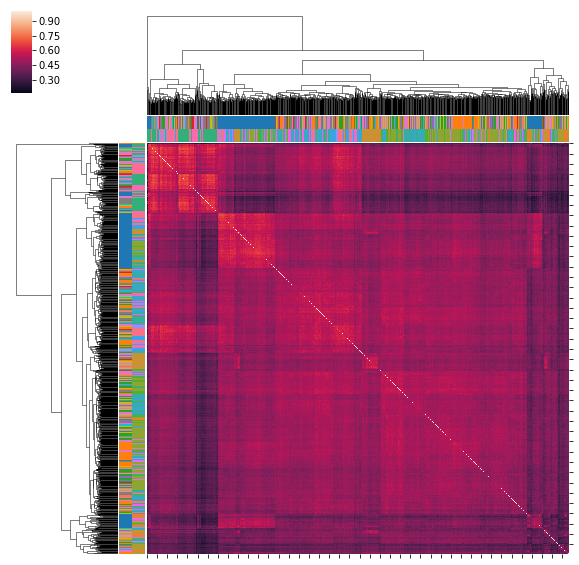

In [67]:
g = sns.clustermap(subset, row_colors = [batch_colors_for_plot, celltype_colors_for_plot], 
                   col_colors = [batch_colors_for_plot, celltype_colors_for_plot])
ax = g.ax_heatmap
ax.set_xticklabels("")
ax.set_yticklabels("")